In [1]:
# !pip install matplotlib

In [2]:
# %%
import os
from pathlib import Path

import matplotlib.pyplot as plt
import scmdata

import openscm_runner
import openscm_runner.adapters
import openscm_runner.run
import openscm_runner.utils

# %%
openscm_runner.__version__


/Users/ylpan/Library/Caches/pypoetry/virtualenvs/openscm-runner-IcrjeKvW-py3.12/lib/python3.12/site-packages/scmdata/database/_database.py:9: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  import tqdm.autonotebook as tqdman


'0.13.1a0'

In [3]:
# %%
os.environ["MAGICC_EXECUTABLE_7"] = str(
    Path("/Users/ylpan/IPCC_Report_Models/magicc-v7.5.3/bin")
    # / ".."
    # / ".."
    # / ".."
    # / "bin"
    / "magicc-darwin-arm64"
)
os.environ["DYLD_LIBRARY_PATH"] = "/opt/homebrew/opt/gfortran/lib/gcc/current/"


In [4]:
magicc7 = openscm_runner.adapters.MAGICC7

# %%
magicc7.get_version()


'v7.5.3'

In [5]:
input_emissions = scmdata.ScmRun(
    str(
        Path("/Users/ylpan/openscm-runner/tests/test-data")
        # / ".."
        # / ".."
        # / ".."
        # / "tests"
        # / "test-data"
        / "clean_scenarios_full_ssps.csv"
    ),
    lowercase_cols=True,
)

input_emissions.head(30)

time                                                                                  2015-01-01 00:00:00  \
activity_id    mip_era model   region scenario unit             variable                                    
not_applicable CMIP6   AIM/CGE World  ssp370   Mt BC/yr         Emissions|BC                     9.727424   
                                               Mt CH4/yr        Emissions|CH4                  388.072796   
                                               Mt CO/yr         Emissions|CO                   934.349885   
                                               kt HFC125/yr     Emissions|HFC125                78.790600   
                                               kt HFC134a/yr    Emissions|HFC134a              201.953400   
                                               kt HFC143a/yr    Emissions|HFC143a               32.381000   
                                               kt HFC152a/yr    Emissions|HFC152a               55.881400   
                                               kt HFC227ea/yr   Emissions|HFC227ea               3.663300   
                                               kt HFC23/yr      Emissions|HFC23                 14.485700   
                                               kt HFC236fa/yr   Emissions|HFC236fa               0.260400   
                                               kt HFC245fa/yr   Emissions|HFC245fa              11.728500   
                                               kt HFC32/yr      Emissions|HFC32                 38.579200   
                                               kt HFC365mfc/yr  Emissions|HFC365mfc              4.649200   
                                               kt HFC4310mee/yr Emissions|HFC4310mee             1.151600   
                                               kt NF3/yr        Emissions|NF3                    1.358100   
                                               kt C2F6/yr       Emissions|C2F6                   1.570000   
                                               kt C3F8/yr       Emissions|C3F8                   0.447800   
                                               kt C4F10/yr      Emissions|C4F10                  0.099400   
                                               kt C5F12/yr      Emissions|C5F12                  0.043500   
                                               kt C6F14/yr      Emissions|C6F14                  0.350000   
                                               kt C7F16/yr      Emissions|C7F16                  0.233800   
                                               kt C8F18/yr      Emissions|C8F18                  0.101400   
                                               kt CF4/yr        Emissions|CF4                   10.869900   
                                               kt cC4F8/yr      Emissions|cC4F8                  1.267200   
                                               kt SF6/yr        Emissions|SF6                    8.020000   
                                               kt SO2F2/yr      Emissions|SO2F2                  2.531700   
                                               kt CCl4/yr       Emissions|CCl4                  47.547600   
                                               kt CFC11/yr      Emissions|CFC11                 43.573400   
                                               kt CFC113/yr     Emissions|CFC113                 0.874200   
                                               kt CFC114/yr     Emissions|CFC114                 1.669600   

time                                                                                  2016-01-01 00:00:00  \
activity_id    mip_era model   region scenario unit             variable                                    
not_applicable CMIP6   AIM/CGE World  ssp370   Mt BC/yr         Emissions|BC                     9.827463   
                                               Mt CH4/yr        Emissions|CH4                  394.145751   
                                               Mt CO/yr         Emissions|C

In [6]:
magicc_res = openscm_runner.run.run(
    climate_models_cfgs={
        "MAGICC7": [
            {},  # passing an empty list of an empty dict will run with defaults
            {"core_climatesensitivity": 3.0},
            {"core_climatesensitivity": 3.5},
            {"core_climatesensitivity": 2.5},
        ],
    },
    scenarios=input_emissions, # "clean_scenarios_full_ssps.csv"
    output_variables=(
        "Surface Air Temperature Change",
        "Atmospheric Concentrations|CO2",
        "Effective Radiative Forcing",
        "Effective Radiative Forcing|CO2",
        "Effective Radiative Forcing|Aerosols",
        "Effective Radiative Forcing|Aerosols|Direct Effect|BC",
        "Effective Radiative Forcing|Aerosols|Direct Effect|OC",
        "Effective Radiative Forcing|Aerosols|Direct Effect|SOx",
        "Effective Radiative Forcing|Aerosols|Direct Effect",
        "Effective Radiative Forcing|Aerosols|Indirect Effect",
    ),
)

Climate models:   0%|          | 0.00/1.00 [00:00<?, ?it/s]Historical data has not been checked
/Users/ylpan/Library/Caches/pypoetry/virtualenvs/openscm-runner-IcrjeKvW-py3.12/lib/python3.12/site-packages/scmdata/run.py:2632: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat([ret._meta.to_frame(), *to_join_metas]).astype("category")
Writing SCEN7 files: 100%|██████████| 10.0/10.0 [00:00<00:00, 10.4it/s]
Front serial: 100%|██████████| 2.00/2.00 [00:02<00:00, 1.39s/it]
Front parallel: 100%|██████████| 2.00/2.00 [00:02<00:00, 1.21s/it]
Parallel runs: 100%|██████████| 36.0/36.0 [00:05<00:00, 6.83it/s]
Climate models: 100%|██████████| 1.00/1.00 [00:13<00:00, 13.7s/it]


In [7]:
magicc_res.get_unique_meta("climate_model", no_duplicates=True)

'MAGICCv7.5.3'

In [46]:
import pandas as pd
df_meta = pd.DataFrame(magicc_res.meta)
df_values = pd.DataFrame(magicc_res.values)
# df = pd.DataFrame(df_meta, df_values)
df = pd.concat([df_meta, df_values], axis=1)
df.to_csv('out.csv')

In [9]:
plot_kwargs = dict(
    quantiles_plumes=[((0.05, 0.95), 0.5), ((0.5,), 1.0)],
    quantile_over="run_id",
    hue_var="scenario",
    style_var="model",
    style_label="IAM",
    time_axis="year",
)

In [47]:
magicc_res.filter(variable="Surface Air Temperature Change", region="World")

<ScmRun (timeseries: 40, timepoints: 336)>
Time:
	Start: 1765-01-01T00:00:00
	End: 2100-01-01T00:00:00
Meta:
	     climate_model            model region  run_id                   scenario  \
	20    MAGICCv7.5.3            IMAGE  World       0                     ssp119   
	70    MAGICCv7.5.3            IMAGE  World       1                     ssp119   
	120   MAGICCv7.5.3            IMAGE  World       2                     ssp119   
	170   MAGICCv7.5.3            IMAGE  World       3                     ssp119   
	220   MAGICCv7.5.3            IMAGE  World       4                     ssp126   
	270   MAGICCv7.5.3            IMAGE  World       5                     ssp126   
	320   MAGICCv7.5.3            IMAGE  World       6                     ssp126   
	370   MAGICCv7.5.3            IMAGE  World       7                     ssp126   
	420   MAGICCv7.5.3  MESSAGE-GLOBIOM  World       8                     ssp245   
	470   MAGICCv7.5.3  MESSAGE-GLOBIOM  World       9                    

/Users/ylpan/Library/Caches/pypoetry/virtualenvs/openscm-runner-IcrjeKvW-py3.12/lib/python3.12/site-packages/scmdata/run.py:197: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/ylpan/Library/Caches/pypoetry/virtualenvs/openscm-runner-IcrjeKvW-py3.12/lib/python3.12/site-packages/scmdata/run.py:197: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/ylpan/Library/Caches/pypoetry/virtualenvs/openscm-runner-IcrjeKvW-py3.12/lib/python3.12/site-packages/scmdata/run.py:19

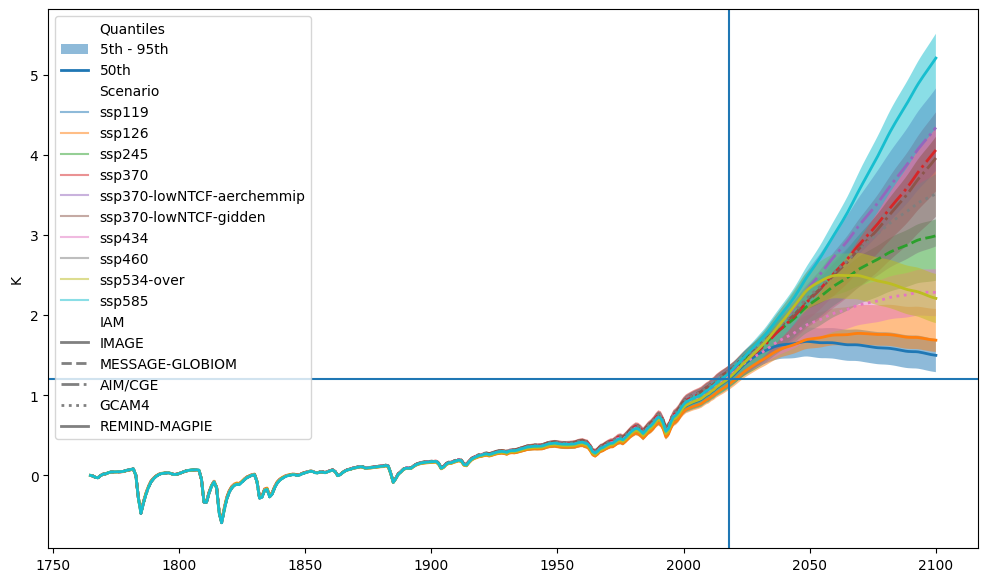

In [15]:
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
magicc_res.filter(variable="Surface Air Temperature Change", region="World").plumeplot(
    ax=ax, **plot_kwargs
)
ax.axhline(1.2)
ax.axvline(2018)

/Users/ylpan/Library/Caches/pypoetry/virtualenvs/openscm-runner-IcrjeKvW-py3.12/lib/python3.12/site-packages/scmdata/run.py:197: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/ylpan/Library/Caches/pypoetry/virtualenvs/openscm-runner-IcrjeKvW-py3.12/lib/python3.12/site-packages/scmdata/run.py:197: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/ylpan/Library/Caches/pypoetry/virtualenvs/openscm-runner-IcrjeKvW-py3.12/lib/python3.12/site-packages/scmdata/run.py:19

(<Axes: ylabel='ppm'>,
  <matplotlib.lines.Line2D at 0x2a0713fb0>])

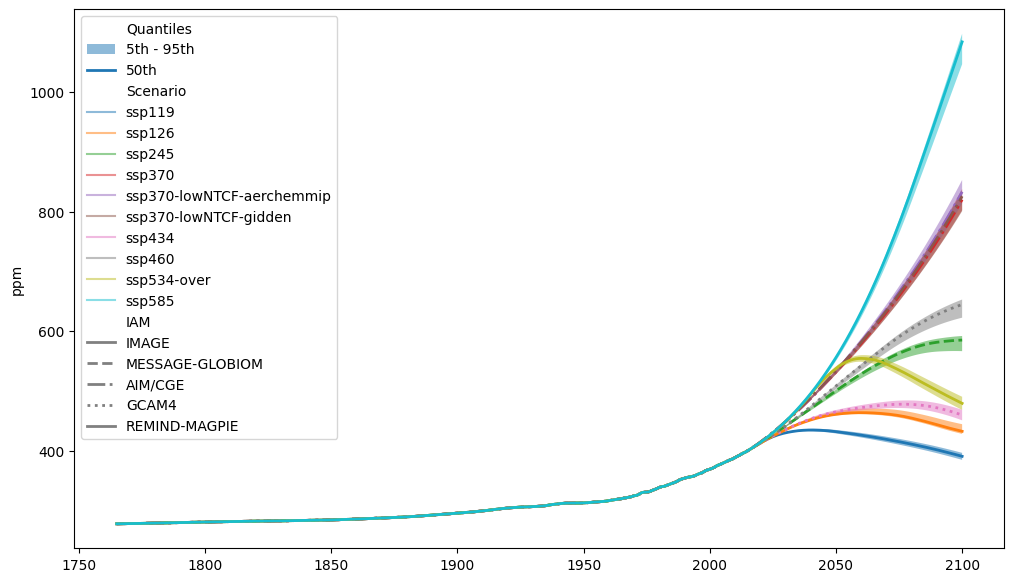

In [16]:
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
magicc_res.filter(variable="Atmospheric Concentrations|CO2", region="World").plumeplot(
    ax=ax, **plot_kwargs
)

/Users/ylpan/Library/Caches/pypoetry/virtualenvs/openscm-runner-IcrjeKvW-py3.12/lib/python3.12/site-packages/scmdata/run.py:197: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/ylpan/Library/Caches/pypoetry/virtualenvs/openscm-runner-IcrjeKvW-py3.12/lib/python3.12/site-packages/scmdata/run.py:197: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.reset_index(inplace=True)
/Users/ylpan/Library/Caches/pypoetry/virtualenvs/openscm-runner-IcrjeKvW-py3.12/lib/python3.12/site-packages/scmdata/run.py:19

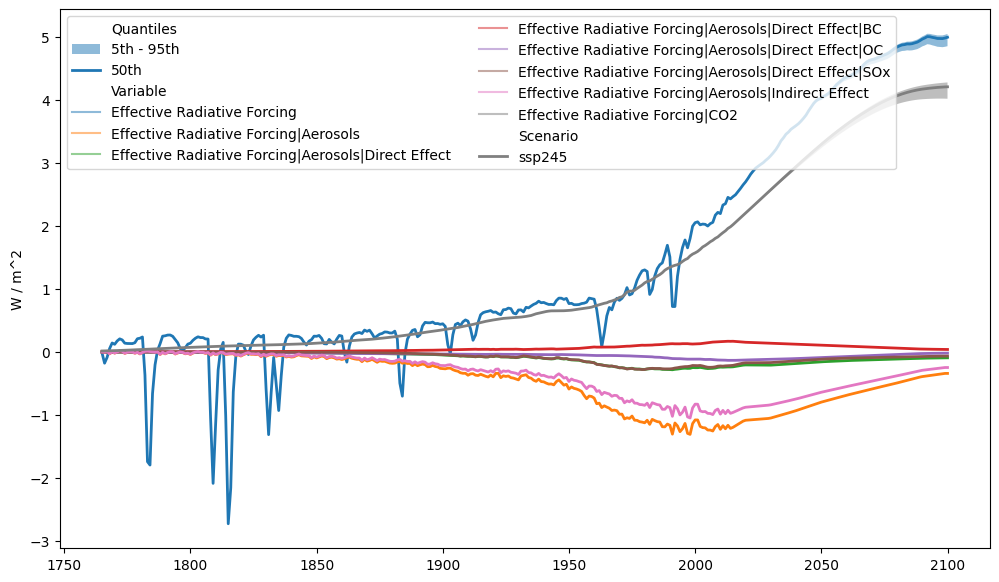

In [17]:
ax = plt.figure(figsize=(12, 7)).add_subplot(111)
ax, legend_items = magicc_res.filter(
    variable="Effective Radiative Forcing*", scenario="ssp245", region="World"
).plumeplot(
    quantiles_plumes=[((0.05, 0.95), 0.5), ((0.5,), 1.0)],
    quantile_over="run_id",
    hue_var="variable",
    hue_label="Variable",
    style_var="scenario",
    style_label="Scenario",
    ax=ax,
    time_axis="year",
)
ax.legend(handles=legend_items, ncol=2, loc="upper left")

In [29]:
magicc_res.filter(
    variable="Surface Air Temperature Change",
    year=2100,
    scenario=["ssp126"],
    region="World",
).values.max()

magicc_res.filter(
    variable="Surface Air Temperature Change",
    year=2100,
    scenario=["ssp126"],
    region="World",
).values.max()

2.1210181

In [19]:
magicc_res.filter(
    variable="Surface Air Temperature Change",
    year=2100,
    scenario=["ssp126"],
    region="World",
).values.min()

1.5411022

In [20]:
magicc_res.filter(
    variable="Surface Air Temperature Change",
    year=2100,
    scenario=["ssp370"],
    region="World",
).values.max()

4.6153086

In [21]:
magicc_res.filter(
    variable="Surface Air Temperature Change",
    year=2100,
    scenario=["ssp370"],
    region="World",
).values.min()

3.4532335

In [22]:
quantiles = openscm_runner.utils.calculate_quantiles(
    magicc_res, [0.05, 0.17, 0.5, 0.83, 0.95]
)

In [23]:
quantiles.filter(
    variable="Surface Air Temperature Change",
    region="World",
    year=2100,
    scenario=["ssp126"],
    quantile=0.05,
).values[0][0]

1.5411022

In [24]:
quantiles.filter(
    variable="Surface Air Temperature Change",
    region="World",
    year=2100,
    scenario=["ssp126"],
    quantile=0.95,
).values[0][0]

2.07807394

In [25]:
quantiles.filter(
    variable="Surface Air Temperature Change",
    region="World",
    year=2100,
    scenario=["ssp370"],
    quantile=0.05,
).values[0][0]

3.544577275